#Libraries

In [1]:
!pip install squarify 
!pip install --upgrade ipywidgets

import numpy as np
import pandas as pd
import seaborn as sns
import squarify as sq
import math
import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn as skl
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, Dropdown
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing, svm
from sklearn.calibration import CalibrationDisplay
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from matplotlib.gridspec import GridSpec
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.4
    Uninstalling widgetsnbextension-3.6.4:
      Successfully uninstalled widgetsnbextension-3.6.4
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [2]:
Results=pd.read_csv('/content/Results.csv')
SprintResults=pd.read_csv('/content/SprintResults.csv')
Status=pd.read_csv('/content/Status.csv')
GrandPrix=pd.read_csv('/content/GrandPrix.csv')
Circuits=pd.read_csv('/content/Circuits.csv')
GP_Year=pd.read_csv('/content/GP_year.csv')
Drivers=pd.read_csv('/content/Drivers.csv')
Constructors=pd.read_csv('/content/Constructors.csv')
Qualifying=pd.read_csv('/content/Qualifying.csv')
LapTime=pd.read_csv('/content/LapTime.csv')
PitStops=pd.read_csv('/content/PitStops.csv')
ConstructorResults=pd.read_csv('/content/ConsResults.csv')
DriverStandings=pd.read_csv('/content/DriverStands.csv')
ConstructorStandings=pd.read_csv('/content/ConsStands.csv')
grid_layout = pd.read_csv('/content/Grid_Layout.csv')
TotalLapTime=pd.read_csv('/content/TotalLapTime.csv')
TotalLPitStopTime=pd.read_csv('/content/TotalLPitStopTime.csv')
Win_layout = pd.read_csv('/content/Total_RaceTime_ms.csv')


#Results

In [3]:
Results.head()

,resultId,D_number,Driver_code,Driver_name,Constructor_name,GP_year,GrandPrix_name,Circuit_name,statusId,Grid_Pos,Finish_Pos,FastestLap_rank,points,Lap,fastestLap,fastestLapTime,fastestLapTime_Milli,fastestLapSpeed
0,1,14,ALO,Fernando Alonso,McLaren,2007,Australian Grand Prix,Albert Park Grand Prix Circuit,Finished,2,2,2,8,58,20,01:26.3,86314,221.178
1,2,44,HAM,Lewis Hamilton,McLaren,2007,Australian Grand Prix,Albert Park Grand Prix Circuit,Finished,4,3,3,6,58,20,01:26.4,86351,221.083
2,3,44,HAM,Lewis Hamilton,McLaren,2007,Bahrain Grand Prix,Bahrain International Circuit,Finished,2,2,2,8,57,18,01:34.3,94270,206.674
3,4,14,ALO,Fernando Alonso,McLaren,2007,Bahrain Grand Prix,Bahrain International Circuit,Finished,4,5,4,4,57,46,01:34.4,94420,206.346
4,5,44,HAM,Lewis Hamilton,McLaren,2007,Spanish Grand Prix,Circuit de Barcelona-Catalunya,Finished,4,2,2,8,65,20,01:22.9,82876,202.205


In [4]:
Results.fastestLapSpeed = Results.fastestLapSpeed.astype(float)
Results.FastestLao_rank = Results.FastestLap_rank.astype(float)
Results.fastestLapTime_Milli = Results.fastestLapTime_Milli.astype(float)

<ipython-input-4-dab7aab92d1b>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Results.FastestLao_rank = Results.FastestLap_rank.astype(float)


Text(0, 0.5, 'Driver')

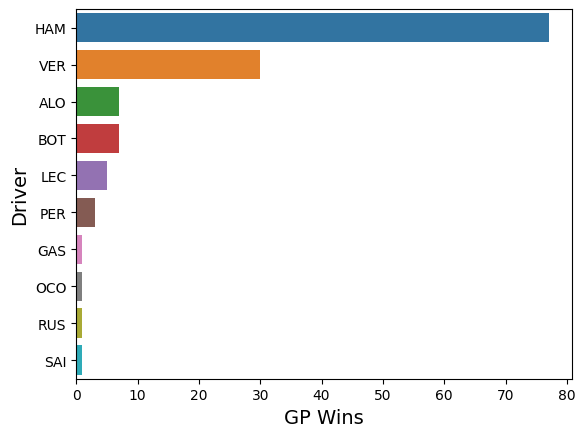

In [5]:
#GP_winners
Driver_winner=Results.loc[Results['Finish_Pos']==1].groupby('Driver_code')['Finish_Pos'].count().sort_values(ascending=False).to_frame().reset_index()

sns.barplot(data=Driver_winner, x='Finish_Pos', y='Driver_code')

plt.xlabel("GP Wins", fontsize=14)
plt.ylabel("Driver", fontsize=14)

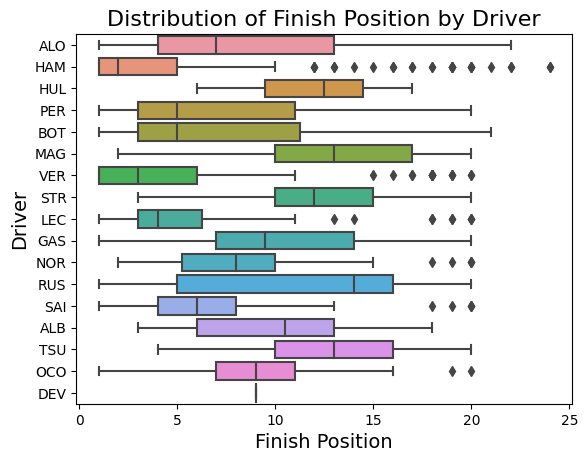

In [6]:
#GP_winners
Driver_winner=Results.loc[Results['Finish_Pos']==1].groupby('Driver_code')['Finish_Pos'].count().sort_values(ascending=False).to_frame().reset_index()

sns.boxplot(data=Results, x='Finish_Pos', y='Driver_code')
plt.xlabel("Finish Position", fontsize=14)
plt.ylabel("Driver", fontsize=14)
plt.title("Distribution of Finish Position by Driver", fontsize=16)
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Driver')

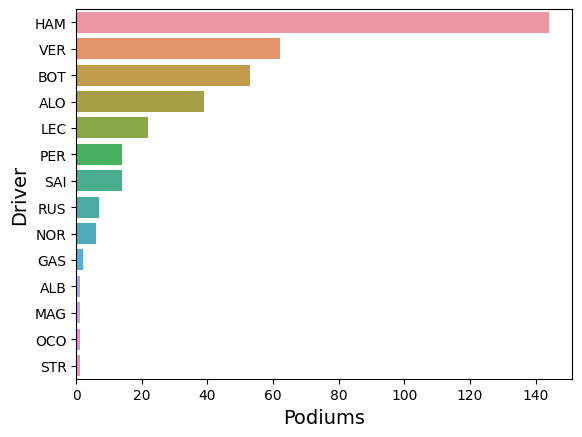

In [7]:
Driver_winner = Results.loc[(Results['Finish_Pos'] == 2) | (Results['Finish_Pos'] == 3) | (Results['Finish_Pos'] == 1)].groupby('Driver_code')['Finish_Pos'].count().sort_values(ascending=False).to_frame().reset_index()

sns.barplot(data=Driver_winner, x='Finish_Pos', y='Driver_code')

plt.xlabel("Podiums", fontsize=14)
plt.ylabel("Driver", fontsize=14)

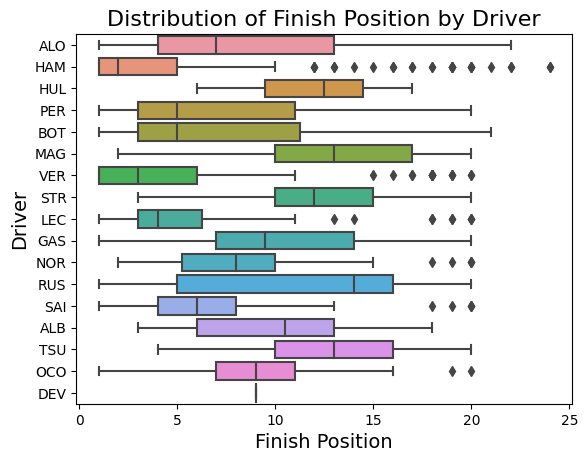

In [8]:
Driver_winner = Results.loc[(Results['Finish_Pos'] == 2) | (Results['Finish_Pos'] == 3) | (Results['Finish_Pos'] == 1)].groupby('Driver_code')['Finish_Pos'].count().sort_values(ascending=False).to_frame().reset_index()

sns.boxplot(data=Results, x='Finish_Pos', y='Driver_code')
plt.xlabel("Finish Position", fontsize=14)
plt.ylabel("Driver", fontsize=14)
plt.title("Distribution of Finish Position by Driver", fontsize=16)
plt.xticks(rotation=0)
plt.show()

In [9]:
# create new dataframe of top 10 GP winners
top10Drivers = Driver_winner.head (10)
print(top10Drivers)

  Driver_code  Finish_Pos
0         HAM         144
1         VER          62
2         BOT          53
3         ALO          39
4         LEC          22
5         PER          14
6         SAI          14
7         RUS           7
8         NOR           6
9         GAS           2


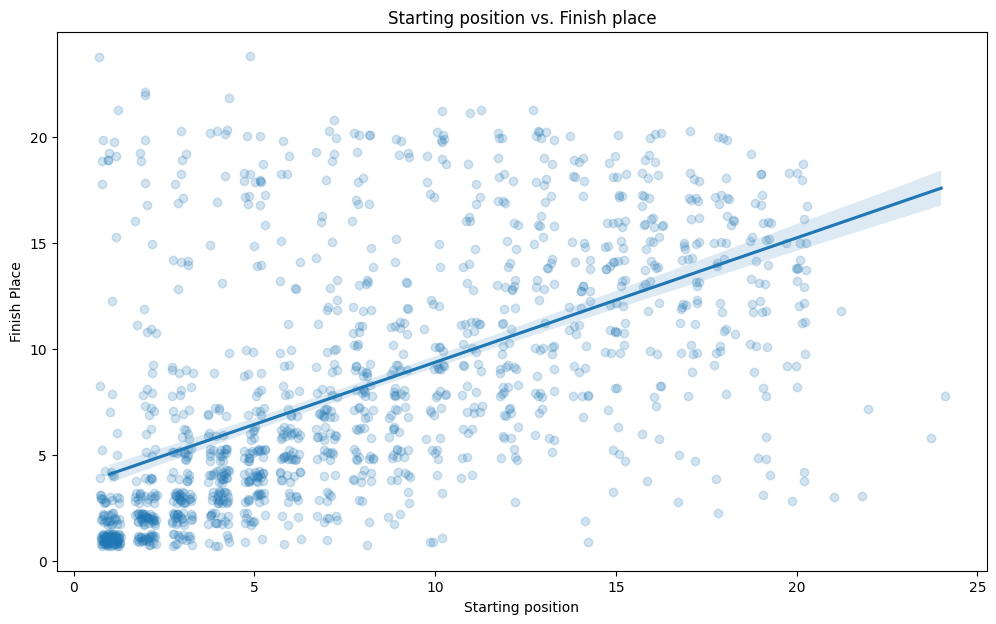

In [10]:
Results_no_zero = Results[Results['Grid_Pos'] != 0]
# create a plot
plt. figure(figsize = [12, 7])
sns.regplot (data = Results_no_zero, x = 'Grid_Pos', y = 'Finish_Pos', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5});
plt.title('Starting position vs. Finish place')
plt.ylabel('Finish Place')
plt.xlabel('Starting position');

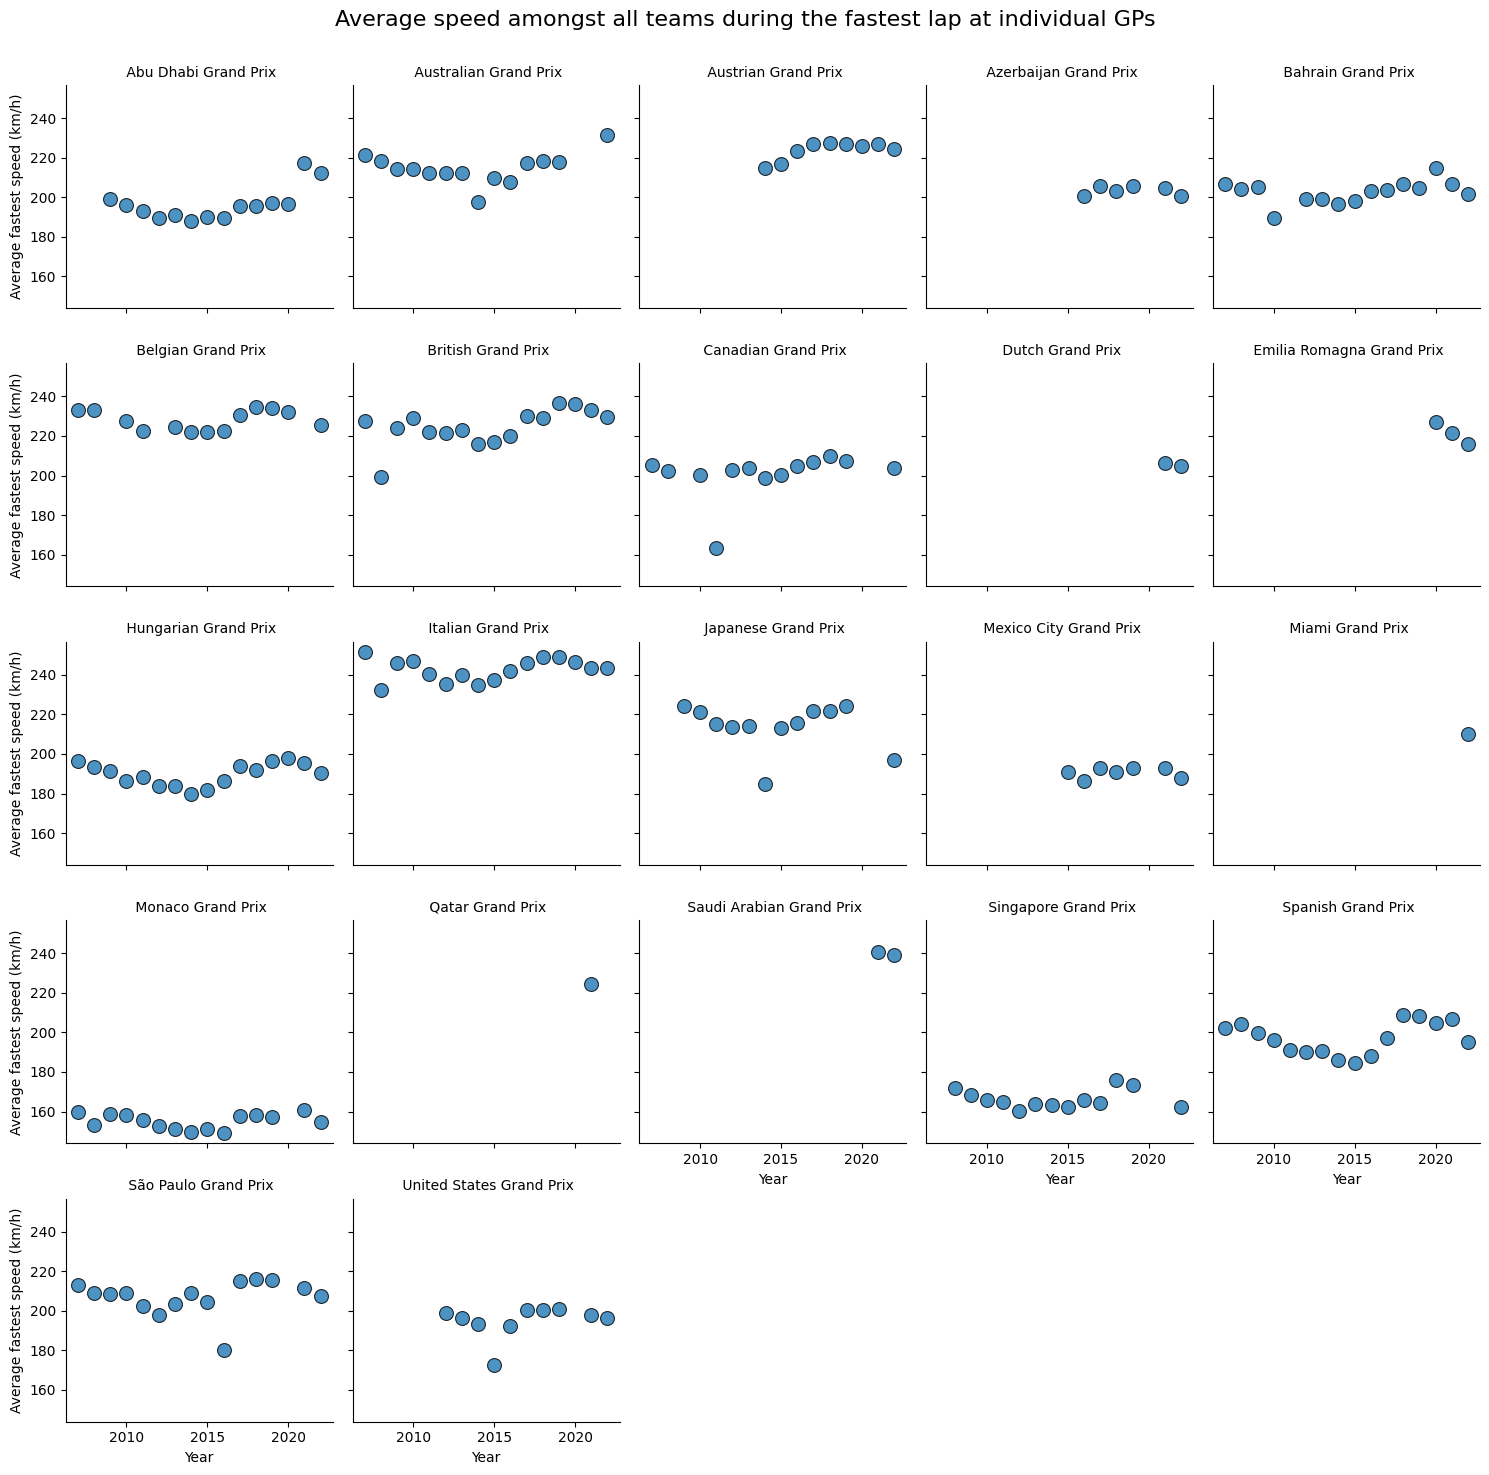

In [11]:
# create new data frame for seasons 2004 onwards 
Results_speed = Results[Results[ 'GP_year'] >= 2007]
Results_group_speed = Results_speed.groupby (['GrandPrix_name', 'GP_year'])['fastestLapSpeed'].mean().to_frame().reset_index()

# create a facetarid
g = sns.FacetGrid(data = Results_group_speed, col = 'GrandPrix_name', col_wrap=5)
g.map(plt.scatter, 'GP_year', 'fastestLapSpeed', alpha = 0.8, linewidth=.8, edgecolor="black", s = 100 )
g.set_titles (" {col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs', fontsize=16);

#Qualifying

In [12]:
Qualifying.head()

,qualifyId,D_number,Driver_code,Driver_name,constructor_name,GP_year,GrandPrix_name,Circuit_name,position,q1,q2,q3,q1_milli,q2_milli,q3_milli
0,1,14,ALO,Fernando Alonso,McLaren,2007,Australian Grand Prix,Albert Park Grand Prix Circuit,2,01:26.697,01:25.326,01:26.493,86697,85326,86493
1,2,14,ALO,Fernando Alonso,McLaren,2007,Bahrain Grand Prix,Bahrain International Circuit,4,01:33.049,01:32.214,01:33.192,93049,92214,93192
2,3,14,ALO,Fernando Alonso,McLaren,2007,Belgian Grand Prix,Circuit de Spa-Francorchamps,3,01:46.058,01:45.442,01:46.091,106058,105442,106091
3,4,14,ALO,Fernando Alonso,McLaren,2007,British Grand Prix,Silverstone Circuit,3,01:19.330,01:19.152,01:20.147,79330,79152,80147
4,5,14,ALO,Fernando Alonso,McLaren,2007,Canadian Grand Prix,Circuit Gilles Villeneuve,2,01:16.562,01:15.522,01:16.163,76562,75522,76163


In [13]:
def calculate_average_q1_times(data_file_path):
    # Load the data into a pandas dataframe
    Qualifying = pd.read_csv(data_file_path)

    # Filter the data to include only races from the starting year onward
    Qualifying = Qualifying[Qualifying['GP_year'] >= 2022]

    # Calculate the average qualifying time for each Grand Prix and each driver
    average_times = Qualifying.groupby(['GrandPrix_name', 'Driver_name'])['q1_milli'].mean().reset_index()

    # Sort by Grand Prix and q1_milli in ascending order
    sorted_times = average_times.sort_values(by=['GrandPrix_name', 'q1_milli'])

    return sorted_times

result = calculate_average_q1_times('/content/Qualifying.csv')
print(result)

               GrandPrix_name      Driver_name  q1_milli
5        Abu Dhabi Grand Prix   Max Verstappen   84754.0
6        Abu Dhabi Grand Prix     Sergio Pérez   84820.0
0        Abu Dhabi Grand Prix     Carlos Sainz   85090.0
1        Abu Dhabi Grand Prix  Charles Leclerc   85211.0
3        Abu Dhabi Grand Prix     Lando Norris   85387.0
..                        ...              ...       ...
151  United States Grand Prix     Sergio Pérez   96163.0
146  United States Grand Prix   George Russell   96195.0
148  United States Grand Prix     Lando Norris   96465.0
152  United States Grand Prix  Valtteri Bottas   96746.0
147  United States Grand Prix     Lance Stroll   96860.0

[153 rows x 3 columns]


In [14]:
def calculate_average_q2_times(data_file_path):
    # Load the data into a pandas dataframe
    Qualifying = pd.read_csv(data_file_path)

    # Filter the data to include only races from the starting year onward
    Qualifying = Qualifying[Qualifying['GP_year'] >= 2022]

    # Calculate the average qualifying time for each Grand Prix and each driver
    average_times = Qualifying.groupby(['GrandPrix_name', 'Driver_name'])['q2_milli'].mean().reset_index()

    # Sort by Grand Prix and q1_milli in ascending order
    sorted_times = average_times.sort_values(by=['GrandPrix_name', 'q2_milli'])

    return sorted_times

result = calculate_average_q2_times('/content/Qualifying.csv')
print(result)

               GrandPrix_name      Driver_name  q2_milli
6        Abu Dhabi Grand Prix     Sergio Pérez   84419.0
1        Abu Dhabi Grand Prix  Charles Leclerc   84517.0
0        Abu Dhabi Grand Prix     Carlos Sainz   84521.0
5        Abu Dhabi Grand Prix   Max Verstappen   84622.0
4        Abu Dhabi Grand Prix   Lewis Hamilton   84774.0
..                        ...              ...       ...
149  United States Grand Prix   Lewis Hamilton   95732.0
151  United States Grand Prix     Sergio Pérez   95864.0
147  United States Grand Prix     Lance Stroll   96032.0
152  United States Grand Prix  Valtteri Bottas   96321.0
148  United States Grand Prix     Lando Norris   96341.0

[153 rows x 3 columns]


In [15]:
def calculate_average_q3_times(data_file_path):
    # Load the data into a pandas dataframe
    Qualifying = pd.read_csv(data_file_path)

    # Filter the data to include only races from the starting year onward
    Qualifying = Qualifying[Qualifying['GP_year'] == 2022]

    # Calculate the average qualifying time for each Grand Prix and each driver
    average_times = Qualifying.groupby(['GrandPrix_name', 'Driver_name'])['q3_milli'].mean().reset_index()

    # Sort by Grand Prix and q1_milli in ascending order
    sorted_times = average_times.sort_values(by=['GrandPrix_name', 'q3_milli'])

    return sorted_times

result = calculate_average_q3_times('/content/Qualifying.csv')
print(result)

               GrandPrix_name      Driver_name  q3_milli
5        Abu Dhabi Grand Prix   Max Verstappen   83824.0
6        Abu Dhabi Grand Prix     Sergio Pérez   84052.0
1        Abu Dhabi Grand Prix  Charles Leclerc   84092.0
0        Abu Dhabi Grand Prix     Carlos Sainz   84242.0
4        Abu Dhabi Grand Prix   Lewis Hamilton   84508.0
..                        ...              ...       ...
149  United States Grand Prix   Lewis Hamilton   94947.0
146  United States Grand Prix   George Russell   94988.0
147  United States Grand Prix     Lance Stroll   95598.0
148  United States Grand Prix     Lando Norris   95690.0
152  United States Grand Prix  Valtteri Bottas   96319.0

[153 rows x 3 columns]


#New columns grid pos and avg quali time

In [16]:
def calculate_average_q_times(data_file_path, starting_year):
    # Load the data into a pandas dataframe
    Qualifying = pd.read_csv(data_file_path)

    # Filter the data to include only races from the starting year onward
    Qualifying = Qualifying[Qualifying['GP_year'] >= starting_year]

    # Calculate the average qualifying time for each Grand Prix and each driver
    average_times = Qualifying.groupby(['GrandPrix_name', 'Driver_name'])[['q1_milli', 'q2_milli', 'q3_milli']].mean().reset_index()
    average_times['average_q_time'] = (average_times['q1_milli'] + average_times['q2_milli'] + average_times['q3_milli']) / 3

    # Sort by Grand Prix and average qualifying time in ascending order
    sorted_times = average_times.sort_values(by=['GrandPrix_name', 'average_q_time'])

    return sorted_times

Avg_Quali = calculate_average_q_times('/content/Qualifying.csv', 2022)
print(Avg_Quali.to_string(index=False))


           GrandPrix_name     Driver_name  q1_milli  q2_milli  q3_milli  average_q_time
     Abu Dhabi Grand Prix  Max Verstappen   84754.0   84622.0   83824.0    84400.000000
     Abu Dhabi Grand Prix    Sergio Pérez   84820.0   84419.0   84052.0    84430.333333
     Abu Dhabi Grand Prix Charles Leclerc   85211.0   84517.0   84092.0    84606.666667
     Abu Dhabi Grand Prix    Carlos Sainz   85090.0   84521.0   84242.0    84617.666667
     Abu Dhabi Grand Prix  Lewis Hamilton   85594.0   84774.0   84508.0    84958.666667
     Abu Dhabi Grand Prix  George Russell   85545.0   84940.0   84511.0    84998.666667
     Abu Dhabi Grand Prix    Lando Norris   85387.0   84903.0   84769.0    85019.666667
    Australian Grand Prix  Max Verstappen   78580.0   78611.0   78154.0    78448.333333
    Australian Grand Prix Charles Leclerc   78881.0   78606.0   77868.0    78451.666667
    Australian Grand Prix    Sergio Pérez   78834.0   78340.0   78240.0    78471.333333
    Australian Grand Prix    Car

In [17]:
def allot_grid_positions(data_file_path, start_year):
    # Load the data into a pandas dataframe
    qualifying = pd.read_csv(data_file_path)

    # Filter the data to include only races from the starting year onward
    qualifying = qualifying[qualifying['GP_year'] >= start_year]

    # Calculate the average qualifying time for each Grand Prix and each driver
    average_times = qualifying.groupby(['GrandPrix_name', 'Driver_name'])[['q1_milli', 'q2_milli', 'q3_milli']].mean().reset_index()
    average_times['average_q_time'] = (average_times['q1_milli'] + average_times['q2_milli'] + average_times['q3_milli']) / 3

    # Sort by Grand Prix and average qualifying time in ascending order
    sorted_times = average_times.sort_values(by=['GrandPrix_name', 'average_q_time'])

    # Group the drivers by Grand Prix and allot Grid_Position based on the order of average qualifying time
    grid_positions = []
    for grand_prix in sorted_times['GrandPrix_name'].unique():
        drivers = sorted_times[sorted_times['GrandPrix_name'] == grand_prix]['Driver_name'].tolist()
        positions = list(range(1, len(drivers) + 1))
        grid_positions.extend(positions)

    # Add the Grid_Position column to the sorted times dataframe
    sorted_times['Grid_Position'] = grid_positions

    return sorted_times[['GrandPrix_name', 'Driver_name', 'Grid_Position', ]]

Grid_Pos = allot_grid_positions('/content/Qualifying.csv', 2022)
print(Grid_Pos.to_string(index=False))


           GrandPrix_name     Driver_name  Grid_Position
     Abu Dhabi Grand Prix  Max Verstappen              1
     Abu Dhabi Grand Prix    Sergio Pérez              2
     Abu Dhabi Grand Prix Charles Leclerc              3
     Abu Dhabi Grand Prix    Carlos Sainz              4
     Abu Dhabi Grand Prix  Lewis Hamilton              5
     Abu Dhabi Grand Prix  George Russell              6
     Abu Dhabi Grand Prix    Lando Norris              7
    Australian Grand Prix  Max Verstappen              1
    Australian Grand Prix Charles Leclerc              2
    Australian Grand Prix    Sergio Pérez              3
    Australian Grand Prix    Carlos Sainz              4
    Australian Grand Prix    Lando Norris              5
    Australian Grand Prix  Lewis Hamilton              6
    Australian Grand Prix  George Russell              7
      Austrian Grand Prix Charles Leclerc              1
      Austrian Grand Prix  Max Verstappen              2
      Austrian Grand Prix    Ca

#Grid position based on avg quali time

In [18]:
Grid_Position=pd.DataFrame(Grid_Pos)
Grid_Position['Avg_time']=Avg_Quali['average_q_time']
Grid_Position.head(153)

,GrandPrix_name,Driver_name,Grid_Position,Avg_time
5,Abu Dhabi Grand Prix,Max Verstappen,1,84400.000000
6,Abu Dhabi Grand Prix,Sergio Pérez,2,84430.333333
1,Abu Dhabi Grand Prix,Charles Leclerc,3,84606.666667
0,Abu Dhabi Grand Prix,Carlos Sainz,4,84617.666667
4,Abu Dhabi Grand Prix,Lewis Hamilton,5,84958.666667
...,...,...,...,...
149,United States Grand Prix,Lewis Hamilton,5,95609.000000
146,United States Grand Prix,George Russell,6,95625.000000
147,United States Grand Prix,Lance Stroll,7,96163.333333
148,United States Grand Prix,Lando Norris,8,96165.333333


In [19]:
# Define dropdown lists
driver_dropdown = Dropdown(options=grid_layout['Driver_name'].unique())
gp_dropdown = Dropdown(options=grid_layout['GrandPrix_name'].unique())

# Define interactive function
@interact(driver=driver_dropdown, gp=gp_dropdown)
def get_grid_position(driver, gp):
    driver_df = grid_layout[grid_layout['Driver_name'] == driver]
    gp_df = driver_df[driver_df['GrandPrix_name'] == gp]
    if not gp_df.empty:
        grid_position = gp_df['Grid_Position'].values[0]
        print(f'{driver} will start at grid position {grid_position} for {gp}.')
    else:
        print(f'{driver} did not participate in {gp}.')


interactive(children=(Dropdown(description='driver', options=('Max Verstappen', 'Sergio Pérez', 'Charles Lecle…

In [20]:
'''from google.colab import files
Grid_Position.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')'''

"from google.colab import files\nGrid_Position.to_csv('output.csv', encoding = 'utf-8-sig') \nfiles.download('output.csv')"

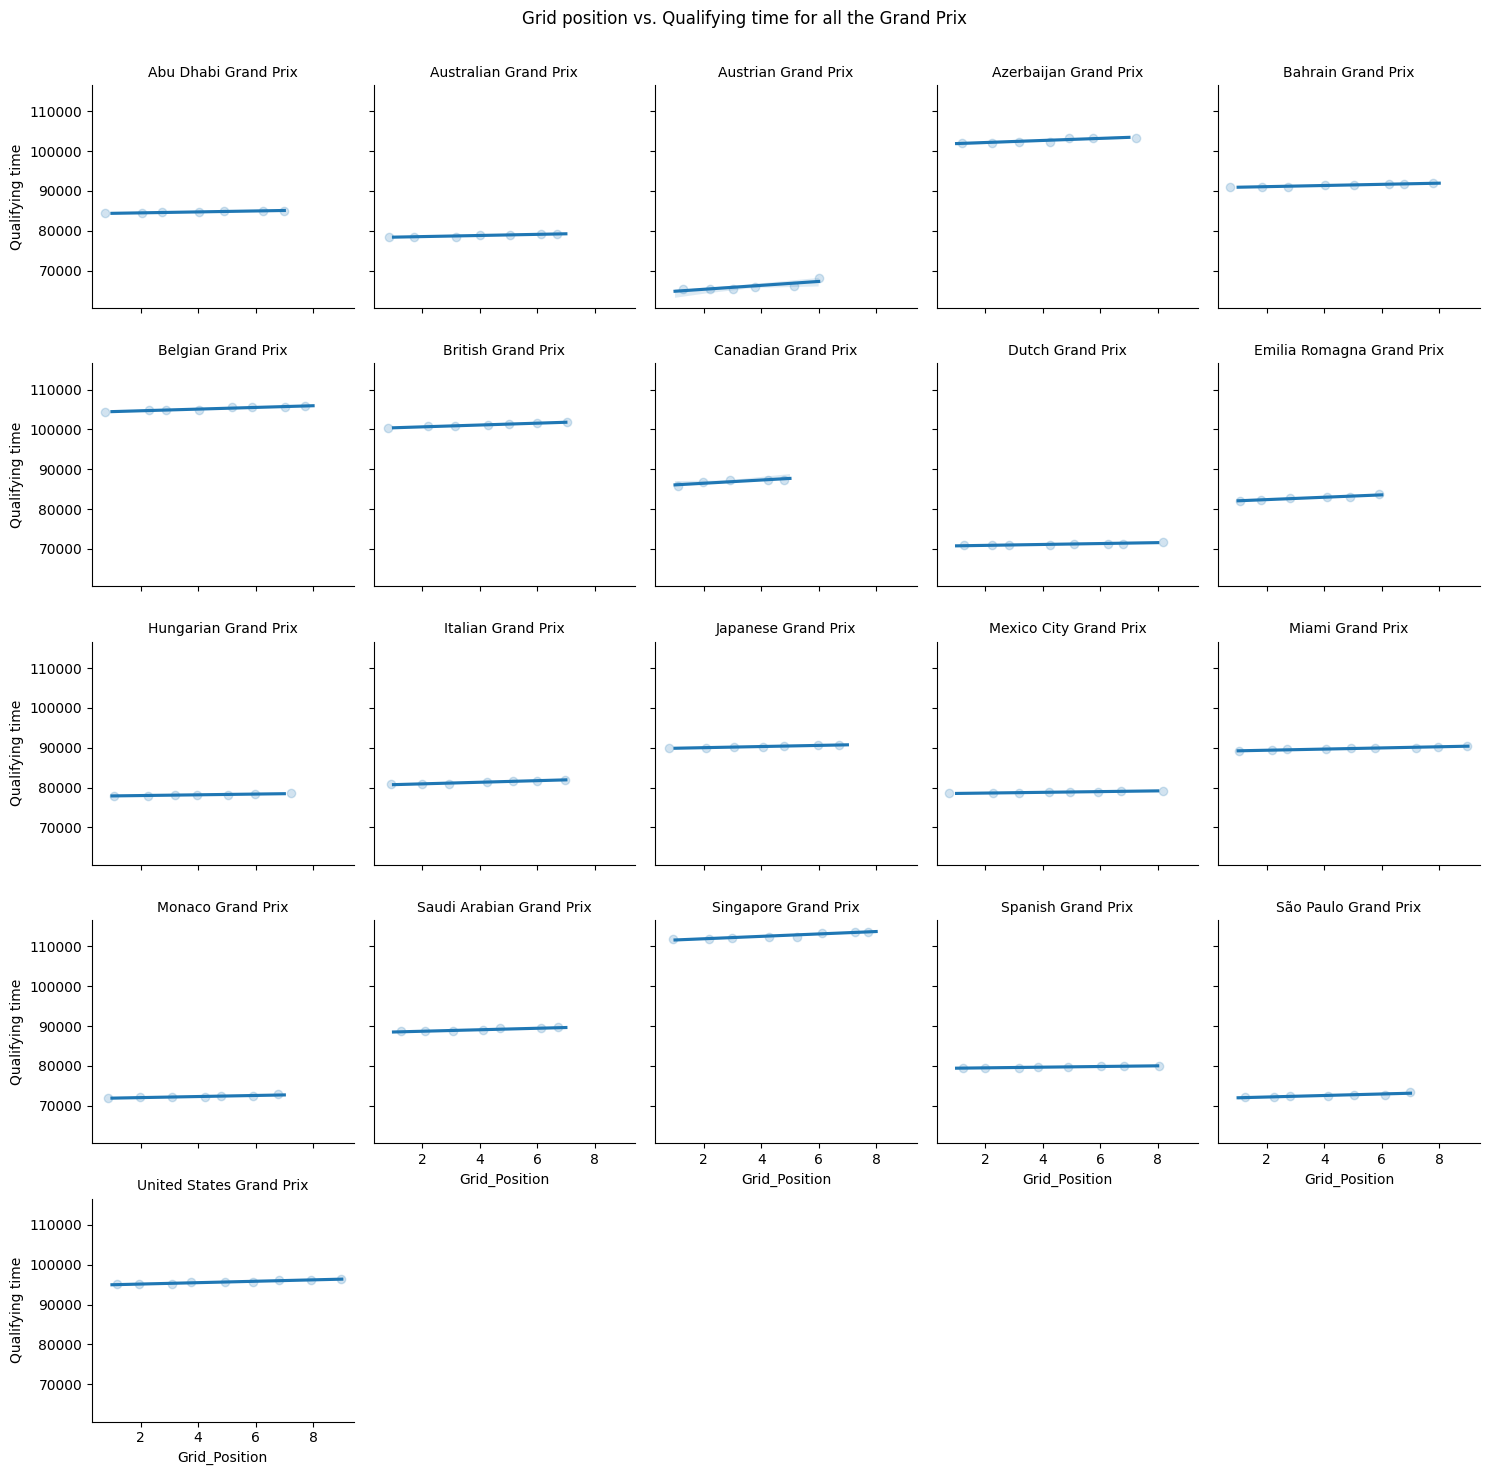

In [21]:
Grid_Position_no_zero = Grid_Position[Grid_Position['Grid_Position'] != 0]

Q = sns.FacetGrid(data=Grid_Position_no_zero, col='GrandPrix_name', col_wrap=5)

Q.map(sns.regplot, 'Grid_Position', 'Avg_time', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha': 1/5})
Q.set_titles('{col_name}')
Q.set_ylabels('Qualifying time')
plt.subplots_adjust(top=0.93)
Q.fig.suptitle('Grid position vs. Qualifying time for all the Grand Prix');
plt.show()

#Grid position Prediction

In [22]:
print("Min time (Pole position): \n      Miami Grand Prix- 89133 \n      United States Grand Prix- 95081 \n      Monaco Grand Prix- 71936 \n      British Grand Prix- 100280 \n      Italian Grand Prix- 80831 \n      Singapore Grand Prix- 111773 \n      Dutch Grand Prix- 70862 \n      Azerbaijan Grand Prix- 102090 \n      Bahrain Grand Prix- 90987 \n      Abu Dhabi Grand Prix- 84400 \n      Saudi Arabian Grand Prix- 88648 \n      Belgian Grand Prix- 104323 \n      Australian Grand Prix- 78448 \n      São Paulo Grand Prix- 72128 \n      Canadian Grand Prix- 85755 \n      Hungarian Grand Prix- 77934 \n      Emilia Romagna Grand Prix- 82029 \n      Mexico City Grand Prix- 78521 \n      Spanish Grand Prix- 79461 \n      Austrian Grand Prix- 65240 \n      Japanese Grand Prix- 89958")

# Define the options for the dropdown list
options = ['Miami Grand Prix', 'United States Grand Prix', 'Monaco Grand Prix',  'British Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix', 
           'Dutch Grand Prix', 'Caesars Palace Grand Prix', 'Azerbaijan Grand Prix', 'Qatar Grand Prix', 'Bahrain Grand Prix', 'Abu Dhabi Grand Prix', 
           'Saudi Arabian Grand Prix', 'Belgian Grand Prix', 'Australian Grand Prix', 'São Paulo Grand Prix', 'Canadian Grand Prix', 'Hungarian Grand Prix', 
           'Emilia Romagna Grand Prix', 'Mexico City Grand Prix', 'Spanish Grand Prix', 'Austrian Grand Prix', 'Japanese Grand Prix']

# Create the dropdown widget
dropdown = widgets.Dropdown(options=options, description='Select GP: ')

# Define the event listener for the dropdown widget
def on_dropdown_change(change):
    # Retrieve the selected value from the dropdown
    GrandPrix_name = change.new

    # Filter the dataset to only include the selected Grand Prix
    df_grand_prix = grid_layout[grid_layout['GrandPrix_name'] == GrandPrix_name]

    # Define the input and output variables
    X = df_grand_prix[['Avg_time']] # Independent variable
    y = df_grand_prix[['Grid_Position']] # Dependent variable

    # Create a linear regression model and fit it to the data
    model = LinearRegression()
    model.fit(X, y)

    # Ask the user for input to predict the Grid_Position value
    input_box = widgets.FloatText(description='Avg_time:')
    display(input_box)
    predict_button = widgets.Button(description='Predict')
    display(predict_button)
    def on_predict_button_clicked(button):
        avg_time = input_box.value
        # Use the linear regression model to predict the Grid_Position value
        grid_position = round(model.predict([[avg_time]])[0][0])

        if grid_position < 1:
            grid_position = 1
        elif grid_position > 20:
            grid_position = 20

        # Print the predicted Grid_Position value
        print(f"The predicted Grid_Position value for the given Avg_time for {GrandPrix_name} is: {grid_position} \n    ")
    predict_button.on_click(on_predict_button_clicked)


# Attach the event listener to the dropdown widget
dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget
display(dropdown)

Min time (Pole position): 
      Miami Grand Prix- 89133 
      United States Grand Prix- 95081 
      Monaco Grand Prix- 71936 
      British Grand Prix- 100280 
      Italian Grand Prix- 80831 
      Singapore Grand Prix- 111773 
      Dutch Grand Prix- 70862 
      Azerbaijan Grand Prix- 102090 
      Bahrain Grand Prix- 90987 
      Abu Dhabi Grand Prix- 84400 
      Saudi Arabian Grand Prix- 88648 
      Belgian Grand Prix- 104323 
      Australian Grand Prix- 78448 
      São Paulo Grand Prix- 72128 
      Canadian Grand Prix- 85755 
      Hungarian Grand Prix- 77934 
      Emilia Romagna Grand Prix- 82029 
      Mexico City Grand Prix- 78521 
      Spanish Grand Prix- 79461 
      Austrian Grand Prix- 65240 
      Japanese Grand Prix- 89958


Dropdown(description='Select GP: ', options=('Miami Grand Prix', 'United States Grand Prix', 'Monaco Grand Pri…

#Qualifying prediction with performance matrix and r2 score

In [23]:
print("Min time (Pole position): \n      Miami Grand Prix- 89133 \n      United States Grand Prix- 95081 \n      Monaco Grand Prix- 71936 \n      British Grand Prix- 100280 \n      Italian Grand Prix- 80831 \n      Singapore Grand Prix- 111773 \n      Dutch Grand Prix- 70862 \n      Azerbaijan Grand Prix- 102090 \n      Bahrain Grand Prix- 90987 \n      Abu Dhabi Grand Prix- 84400 \n      Saudi Arabian Grand Prix- 88648 \n      Belgian Grand Prix- 104323 \n      Australian Grand Prix- 78448 \n      São Paulo Grand Prix- 72128 \n      Canadian Grand Prix- 85755 \n      Hungarian Grand Prix- 77934 \n      Emilia Romagna Grand Prix- 82029 \n      Mexico City Grand Prix- 78521 \n      Spanish Grand Prix- 79461 \n      Austrian Grand Prix- 65240 \n      Japanese Grand Prix- 89958")

# Define the options for the dropdown list
options = ['Miami Grand Prix', 'United States Grand Prix', 'Monaco Grand Prix',  'British Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix', 
           'Dutch Grand Prix', 'Caesars Palace Grand Prix', 'Azerbaijan Grand Prix', 'Qatar Grand Prix', 'Bahrain Grand Prix', 'Abu Dhabi Grand Prix', 
           'Saudi Arabian Grand Prix', 'Belgian Grand Prix', 'Australian Grand Prix', 'São Paulo Grand Prix', 'Canadian Grand Prix', 'Hungarian Grand Prix', 
           'Emilia Romagna Grand Prix', 'Mexico City Grand Prix', 'Spanish Grand Prix', 'Austrian Grand Prix', 'Japanese Grand Prix']

# Create the dropdown widget
dropdown = widgets.Dropdown(options=options, description='Select GP: ')

# Define the event listener for the dropdown widget
def on_dropdown_change(change):
    # Retrieve the selected value from the dropdown
    GrandPrix_name = change.new

    # Filter the dataset to only include the selected Grand Prix
    df_grand_prix = grid_layout[grid_layout['GrandPrix_name'] == GrandPrix_name]

    # Define the input and output variables
    X = df_grand_prix[['Avg_time']] # Independent variable
    y = df_grand_prix[['Grid_Position']] # Dependent variable

    # Create a linear regression model and fit it to the data
    model = LinearRegression()
    model.fit(X, y)

    # Ask the user for input to predict the Grid_Position value
    input_box = widgets.FloatText(description='Avg_time:')
    display(input_box)
    predict_button = widgets.Button(description='Predict')
    display(predict_button)

    def on_predict_button_clicked(button):
        avg_time = input_box.value
       # Use the linear regression model to predict the Finish Position value
        grid_position = round(model.predict([[avg_time]])[0][0])

        if grid_position < 1:
            grid_position = 1
        elif grid_position > 20:
            grid_position = 20

        # Calculate the performance metrics
        y_pred = model.predict(X)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = mean_squared_error(y, y_pred, squared=False)
        r2 = r2_score(y, y_pred)

        # Print the predicted Finish Position value and performance metrics
        print(f"The predicted Grid Position value for the given Avg_time for {GrandPrix_name} is: {grid_position}")
        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        print(f"R-squared Score: {r2:.2f}\n")
    predict_button.on_click(on_predict_button_clicked)

# Attach the event listener to the dropdown widget
dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget
display(dropdown)

Min time (Pole position): 
      Miami Grand Prix- 89133 
      United States Grand Prix- 95081 
      Monaco Grand Prix- 71936 
      British Grand Prix- 100280 
      Italian Grand Prix- 80831 
      Singapore Grand Prix- 111773 
      Dutch Grand Prix- 70862 
      Azerbaijan Grand Prix- 102090 
      Bahrain Grand Prix- 90987 
      Abu Dhabi Grand Prix- 84400 
      Saudi Arabian Grand Prix- 88648 
      Belgian Grand Prix- 104323 
      Australian Grand Prix- 78448 
      São Paulo Grand Prix- 72128 
      Canadian Grand Prix- 85755 
      Hungarian Grand Prix- 77934 
      Emilia Romagna Grand Prix- 82029 
      Mexico City Grand Prix- 78521 
      Spanish Grand Prix- 79461 
      Austrian Grand Prix- 65240 
      Japanese Grand Prix- 89958


Dropdown(description='Select GP: ', options=('Miami Grand Prix', 'United States Grand Prix', 'Monaco Grand Pri…

#LapTime

In [24]:
#GP winner -> total time comparison(average Laptime * no of laps)+(average PitStop time)

In [25]:
LapTime.head()

,Lap_id,D_number,Driver_code,Driver_name,GP_year,GrandPrix_name,Circuit_name,lap,position,Lap_time,LapTime_milli
0,1,44,HAM,Lewis Hamilton,2011,Australian Grand Prix,Albert Park Grand Prix Circuit,1.0,2.0,01:40.573,100573.0
1,2,44,HAM,Lewis Hamilton,2011,Australian Grand Prix,Albert Park Grand Prix Circuit,2.0,2.0,01:33.774,93774.0
2,3,44,HAM,Lewis Hamilton,2011,Australian Grand Prix,Albert Park Grand Prix Circuit,3.0,2.0,01:32.900,92900.0
3,4,44,HAM,Lewis Hamilton,2011,Australian Grand Prix,Albert Park Grand Prix Circuit,4.0,2.0,01:32.582,92582.0
4,5,44,HAM,Lewis Hamilton,2011,Australian Grand Prix,Albert Park Grand Prix Circuit,5.0,2.0,01:32.471,92471.0


In [26]:
# Group the dataframe by Driver and Grand Prix
grouped = LapTime.groupby(['Driver_name', 'GrandPrix_name'])

# Calculate the total lap time for each Driver and Grand Prix
total_lap_time = grouped['LapTime_milli'].sum()

# Calculate the total lap time and lap count for each Driver and Grand Prix
lap_count = grouped['lap'].count()

# Calculate the average lap time for each Driver and Grand Prix
Avg_LapTime = total_lap_time / lap_count

# Print the average lap time for each Driver and Grand Prix
print(Avg_LapTime)

'''from google.colab import files
Avg_LapTime.to_csv('Avg_LapTime.csv', encoding = 'utf-8-sig') 
files.download('Avg_LapTime.csv')'''

Driver_name      GrandPrix_name          
Carlos Sainz     Abu Dhabi Grand Prix        109340.000000
                 Australian Grand Prix        97442.377778
                 Austrian Grand Prix          77685.547170
                 Azerbaijan Grand Prix       112991.032258
                 Bahrain Grand Prix           87454.642857
                                                 ...      
Valtteri Bottas  Monaco Grand Prix            95907.394928
                 Singapore Grand Prix        120024.587912
                 Spanish Grand Prix           94777.724409
                 São Paulo Grand Prix         78501.210811
                 United States Grand Prix    109710.846154
Length: 135, dtype: float64


"from google.colab import files\nAvg_LapTime.to_csv('Avg_LapTime.csv', encoding = 'utf-8-sig') \nfiles.download('Avg_LapTime.csv')"

In [27]:
Avg_LapTime.head()

Driver_name   GrandPrix_name       
Carlos Sainz  Abu Dhabi Grand Prix     109340.000000
              Australian Grand Prix     97442.377778
              Austrian Grand Prix       77685.547170
              Azerbaijan Grand Prix    112991.032258
              Bahrain Grand Prix        87454.642857
dtype: float64

In [28]:
# Set Pandas options to display values in non-scientific format
pd.options.display.float_format = '{:.2f}'.format

# Merge the two dataframes on GrandPrix_name
merged_df = LapTime.merge(Circuits, on='GrandPrix_name')

# Calculate the total lap time for each Driver and Grand Prix
grouped = merged_df.groupby(['Driver_name', 'GrandPrix_name'])
total_lap_time = grouped['LapTime_milli'].sum()

# Calculate the lap count for each Grand Prix
lap_count = grouped['lap'].count()

# Calculate the average lap time for each Driver and Grand Prix
avg_lap_time = total_lap_time / lap_count

# Multiply the average lap time by the number of laps for each Grand Prix
lap_count_per_race = merged_df[['GrandPrix_name', 'Laps']].drop_duplicates()
lap_count_per_race = lap_count_per_race.set_index('GrandPrix_name')['Laps']
total_race_time = avg_lap_time * lap_count_per_race

# Print the total race time for each Driver and Grand Prix
print(total_race_time)


Driver_name      GrandPrix_name          
Carlos Sainz     Abu Dhabi Grand Prix       6341720.00
                 Australian Grand Prix      5651657.91
                 Austrian Grand Prix        5515673.85
                 Azerbaijan Grand Prix      5762542.65
                 Bahrain Grand Prix         4984914.64
                                               ...    
Valtteri Bottas  Monaco Grand Prix          7480776.80
                 Singapore Grand Prix       7561549.04
                 Spanish Grand Prix         6255329.81
                 São Paulo Grand Prix       5573585.97
                 United States Grand Prix   6143807.38
Length: 135, dtype: float64


In [29]:
def allot_grid_positions(data_file_path, start_year):
      # Set Pandas options to display values in non-scientific format
      pd.options.display.float_format = '{:.2f}'.format

      LapTime = LapTime[LapTime['GP_year'] == 2022]

      # Merge the two dataframes on GrandPrix_name
      merged_df = LapTime.merge(Circuits, on='GrandPrix_name')

      # Calculate the total lap time for each Driver and Grand Prix
      grouped = merged_df.groupby(['Driver_name', 'GrandPrix_name'])
      total_lap_time = grouped['LapTime_milli'].sum()

      # Calculate the lap count for each Grand Prix
      lap_count = grouped['lap'].count()

      # Calculate the average lap time for each Driver and Grand Prix
      avg_lap_time = total_lap_time / lap_count

      # Multiply the average lap time by the number of laps for each Grand Prix
      lap_count_per_race = merged_df[['GrandPrix_name', 'Laps']].drop_duplicates()
      lap_count_per_race = lap_count_per_race.set_index('GrandPrix_name')['Laps']
      total_race_time = avg_lap_time * lap_count_per_race

      # Create a new dataframe with the Grand Prix name, Driver name, and Total race time
      final_df = pd.DataFrame({'GrandPrix_name': total_race_time.index.get_level_values(1),
                              'Driver_name': total_race_time.index.get_level_values(0),
                              'Total race time (ms)': total_race_time.values})

      # Sort the dataframe by the Total race time in ascending order for each Grand Prix
      final_df = final_df.sort_values(['GrandPrix_name', 'Total race time (ms)'])

      # Display the final dataframe
      final_df.head(5)


In [30]:
'''from google.colab import files
final_df.to_csv('TotalLapTime.csv', encoding = 'utf-8-sig') 
files.download('TotalLapTime.csv')'''

"from google.colab import files\nfinal_df.to_csv('TotalLapTime.csv', encoding = 'utf-8-sig') \nfiles.download('TotalLapTime.csv')"

#PitStop

In [31]:
# Group by year, driver, and grand prix, and count the number of pit stops
pit_stop_counts = PitStops.groupby(['GP_year', 'GrandPrix_name','Driver_name'])['N_stop'].count().reset_index()
pit_stop_counts.rename(columns={'N_stop': 'pit_stop_count'}, inplace=True)

# Group by driver and grand prix, and calculate the average number of pit stops for all years
avg_pit_stop_counts = pit_stop_counts.groupby(['GrandPrix_name', 'Driver_name'])['pit_stop_count'].mean().reset_index()
avg_pit_stop_counts.rename(columns={'pit_stop_count': 'avg_pit_stop_count'}, inplace=True)

# Print the results

avg_pit_stop_counts.head(50)


,GrandPrix_name,Driver_name,avg_pit_stop_count
0,Abu Dhabi Grand Prix,Alexander Albon,1.33
1,Abu Dhabi Grand Prix,Carlos Sainz,1.50
2,Abu Dhabi Grand Prix,Charles Leclerc,1.40
3,Abu Dhabi Grand Prix,Esteban Ocon,1.33
4,Abu Dhabi Grand Prix,Fernando Alonso,1.70
5,Abu Dhabi Grand Prix,George Russell,1.33
6,Abu Dhabi Grand Prix,Kevin Magnussen,1.29
7,Abu Dhabi Grand Prix,Lance Stroll,1.83
8,Abu Dhabi Grand Prix,Lando Norris,1.50
9,Abu Dhabi Grand Prix,Lewis Hamilton,1.45


In [32]:
# Group by driver and grand prix, and calculate the average pit stop time
avg_pit_stop_time = PitStops.groupby(['GrandPrix_name', 'Driver_name'])['milliseconds'].mean().reset_index()
avg_pit_stop_time.rename(columns={'milliseconds': 'avg_pit_stop_time_ms'}, inplace=True)

# Convert the average pit stop time to seconds
#avg_pit_stop_time['avg_pit_stop_time_s'] = avg_pit_stop_time['avg_pit_stop_time_ms'] / 1000

# Print the results
avg_pit_stop_time.head(50)


,GrandPrix_name,Driver_name,avg_pit_stop_time_ms
0,Abu Dhabi Grand Prix,Alexander Albon,21781.75
1,Abu Dhabi Grand Prix,Carlos Sainz,22186.50
2,Abu Dhabi Grand Prix,Charles Leclerc,21831.57
3,Abu Dhabi Grand Prix,Esteban Ocon,22228.25
4,Abu Dhabi Grand Prix,Fernando Alonso,22664.18
5,Abu Dhabi Grand Prix,George Russell,24132.75
6,Abu Dhabi Grand Prix,Kevin Magnussen,22663.33
7,Abu Dhabi Grand Prix,Lance Stroll,22588.55
8,Abu Dhabi Grand Prix,Lando Norris,22026.67
9,Abu Dhabi Grand Prix,Lewis Hamilton,21390.06


In [33]:
# Group by driver and grand prix, and calculate the average pit stop time and count
avg_pit_stop_time = PitStops.groupby(['GrandPrix_name','Driver_name'])['milliseconds'].mean().reset_index()
avg_pit_stop_time.rename(columns={'milliseconds': 'avg_pit_stop_time_ms'}, inplace=True)

avg_pit_stop_count = PitStops.groupby(['Driver_name', 'GrandPrix_name'])['N_stop'].mean().reset_index()
avg_pit_stop_count.rename(columns={'N_stop': 'avg_pit_stop_count'}, inplace=True)

# Merge the two dataframes on driver and grand prix
avg_pit_stop = pd.merge(avg_pit_stop_time, avg_pit_stop_count, on=[ 'GrandPrix_name', 'Driver_name'])

# Calculate the total time spent in pit stops
avg_pit_stop['total_pit_stop_time_ms'] = avg_pit_stop['avg_pit_stop_time_ms']  * avg_pit_stop['avg_pit_stop_count']


# Print the results
avg_pit_stop.head(5)


,GrandPrix_name,Driver_name,avg_pit_stop_time_ms,avg_pit_stop_count,total_pit_stop_time_ms
0,Abu Dhabi Grand Prix,Alexander Albon,21781.75,1.25,27227.19
1,Abu Dhabi Grand Prix,Carlos Sainz,22186.50,1.33,29582.00
2,Abu Dhabi Grand Prix,Charles Leclerc,21831.57,1.29,28069.16
3,Abu Dhabi Grand Prix,Esteban Ocon,22228.25,1.25,27785.31
4,Abu Dhabi Grand Prix,Fernando Alonso,22664.18,1.59,35996.04


In [34]:
'''from google.colab import files
avg_pit_stop.to_csv('TotalLPitStopTime.csv', encoding = 'utf-8-sig') 
files.download('TotalLPitStopTime.csv')'''

"from google.colab import files\navg_pit_stop.to_csv('TotalLPitStopTime.csv', encoding = 'utf-8-sig') \nfiles.download('TotalLPitStopTime.csv')"

#Total Race Time

In [35]:
# Calculate total pit stop time in seconds
total_pit_stop_time = TotalLPitStopTime.groupby(['Driver_name', 'GrandPrix_name'])['total_pit_stop_time_ms'].sum().reset_index()

# Merge the two dataframes on driver and grand prix
Total_RaceTime = pd.merge(TotalLapTime, total_pit_stop_time, on=['GrandPrix_name','Driver_name'])

# Add the total pit stop time in seconds to the total race time in milliseconds
Total_RaceTime['Total race time (ms)'] = Total_RaceTime['Total race time (ms)'] + Total_RaceTime['total_pit_stop_time_ms']

# Drop the unnecessary columns
Total_RaceTime.drop(['total_pit_stop_time_ms'], axis=1, inplace=True)

# Convert total race time to hours, minutes, seconds, and milliseconds format
Total_RaceTime['Total_race_time'] = pd.to_timedelta(Total_RaceTime['Total race time (ms)'], unit='ms').apply(lambda x: '{:02d}:{:02d}:{:02d}.{:03d}'.format(x.seconds // 3600, (x.seconds % 3600) // 60, x.seconds % 60, x.microseconds // 1000))

# Drop the original total race time column and sort by grand prix and total race time
Total_RaceTime.drop(['Total race time (ms)'], axis=1, inplace=True)
Total_RaceTime = Total_RaceTime.sort_values(['GrandPrix_name', 'Total_race_time'])
Total_RaceTime.reset_index(drop=True, inplace=True)

# Sort each group by total race time in ascending order and assign finish positions
Total_RaceTime['Finish_Position'] = Total_RaceTime.groupby('GrandPrix_name')['Total_race_time'].rank(method='min').round(0).astype(int)

# Print the results
Total_RaceTime.head(50)


,Unnamed: 0,GrandPrix_name,Driver_name,Total_race_time,Finish_Position
0,202,Abu Dhabi Grand Prix,Max Verstappen,01:28:18.437,1
1,37,Abu Dhabi Grand Prix,Charles Leclerc,01:28:22.754,2
2,247,Abu Dhabi Grand Prix,Sergio Pérez,01:28:31.341,3
3,18,Abu Dhabi Grand Prix,Carlos Sainz,01:28:40.388,4
4,100,Abu Dhabi Grand Prix,George Russell,01:28:51.967,5
5,58,Abu Dhabi Grand Prix,Esteban Ocon,01:29:10.939,6
6,161,Abu Dhabi Grand Prix,Lando Norris,01:29:11.516,7
7,182,Abu Dhabi Grand Prix,Lewis Hamilton,01:29:20.897,8
8,140,Abu Dhabi Grand Prix,Lance Stroll,01:29:37.754,9
9,289,Abu Dhabi Grand Prix,Yuki Tsunoda,01:29:48.366,10


#Total Race Time in ms

In [36]:
# Calculate total pit stop time in seconds
total_pit_stop_time = TotalLPitStopTime.groupby(['Driver_name', 'GrandPrix_name'])['total_pit_stop_time_ms'].sum().reset_index()

# Merge the two dataframes on driver and grand prix
Total_RaceTime_ms = pd.merge(TotalLapTime, total_pit_stop_time, on=['GrandPrix_name','Driver_name'])

# Add the total pit stop time in seconds to the total race time in milliseconds
Total_RaceTime_ms['Total race time (ms)'] = Total_RaceTime_ms['Total race time (ms)'] + Total_RaceTime_ms['total_pit_stop_time_ms']

# Drop the unnecessary columns
Total_RaceTime_ms.drop(['total_pit_stop_time_ms'], axis=1, inplace=True)


Total_RaceTime_ms = Total_RaceTime_ms.sort_values(['GrandPrix_name', 'Total race time (ms)'])
Total_RaceTime_ms.reset_index(drop=True, inplace=True)

# Sort each group by total race time in ascending order and assign finish positions
Total_RaceTime_ms['Finish_Position'] = Total_RaceTime_ms.groupby('GrandPrix_name')['Total race time (ms)'].rank(method='min').round(0).astype(int)

# Print the results
Total_RaceTime_ms.head(3000)


,Unnamed: 0,GrandPrix_name,Driver_name,Total race time (ms),Finish_Position
0,202,Abu Dhabi Grand Prix,Max Verstappen,5298437.88,1
1,37,Abu Dhabi Grand Prix,Charles Leclerc,5302754.16,2
2,247,Abu Dhabi Grand Prix,Sergio Pérez,5311341.84,3
3,18,Abu Dhabi Grand Prix,Carlos Sainz,5320388.00,4
4,100,Abu Dhabi Grand Prix,George Russell,5331967.94,5
...,...,...,...,...,...
283,308,United States Grand Prix,Yuki Tsunoda,6237953.50,10
284,78,United States Grand Prix,Esteban Ocon,6246163.60,11
285,17,United States Grand Prix,Alexander Albon,6253527.08,12
286,160,United States Grand Prix,Lance Stroll,6347953.76,13


In [37]:
# Define dropdown lists
driver_dropdown = Dropdown(options=Win_layout['Driver_name'].unique())
gp_dropdown = Dropdown(options=Win_layout['GrandPrix_name'].unique())

# Define interactive function
@interact(Driver_name=driver_dropdown, Grand_prix=gp_dropdown)
def get_finish_position(Driver_name, Grand_prix):
    driver_df = Win_layout[Win_layout['Driver_name'] == Driver_name]
    gp_df = driver_df[driver_df['GrandPrix_name'] == Grand_prix]
    if not gp_df.empty:
        finish_position = gp_df['Finish_Position'].values[0]
        print(f'{Driver_name} finished at {finish_position} place in {Grand_prix}.')
    else:
        print(f'{Driver_name} did not participate in {Grand_prix}.')


interactive(children=(Dropdown(description='Driver_name', options=('Max Verstappen', 'Charles Leclerc', 'Sergi…

In [38]:
'''from google.colab import files
Total_RaceTime_ms.to_csv('Total_RaceTime_ms.csv', encoding = 'utf-8-sig') 
files.download('Total_RaceTime_ms.csv')'''

"from google.colab import files\nTotal_RaceTime_ms.to_csv('Total_RaceTime_ms.csv', encoding = 'utf-8-sig') \nfiles.download('Total_RaceTime_ms.csv')"

#Win Prediction program

In [39]:
print("Min time (Winning position) for: \n      Miami Grand Prix- 89133 \n      United States Grand Prix- 95081 \n      Monaco Grand Prix- 71936 \n      British Grand Prix- 100280 \n      Italian Grand Prix- 80831 \n      Singapore Grand Prix- 111773 \n      Dutch Grand Prix- 70862 \n      Azerbaijan Grand Prix- 102090 \n      Bahrain Grand Prix- 90987 \n      Abu Dhabi Grand Prix- 84400 \n      Saudi Arabian Grand Prix- 88648 \n      Belgian Grand Prix- 104323 \n      Australian Grand Prix- 78448 \n      São Paulo Grand Prix- 72128 \n      Canadian Grand Prix- 85755 \n      Hungarian Grand Prix- 77934 \n      Emilia Romagna Grand Prix- 82029 \n      Mexico City Grand Prix- 78521 \n      Spanish Grand Prix- 79461 \n      Austrian Grand Prix- 65240 \n      Japanese Grand Prix- 89958")

# Define the options for the dropdown list
options = ['Miami Grand Prix', 'United States Grand Prix', 'Monaco Grand Prix',  'British Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix', 
           'Dutch Grand Prix', 'Caesars Palace Grand Prix', 'Azerbaijan Grand Prix', 'Qatar Grand Prix', 'Bahrain Grand Prix', 'Abu Dhabi Grand Prix', 
           'Saudi Arabian Grand Prix', 'Belgian Grand Prix', 'Australian Grand Prix', 'São Paulo Grand Prix', 'Canadian Grand Prix', 'Hungarian Grand Prix', 
           'Emilia Romagna Grand Prix', 'Mexico City Grand Prix', 'Spanish Grand Prix', 'Austrian Grand Prix', 'Japanese Grand Prix']

# Create the dropdown widget
dropdown = widgets.Dropdown(options=options, description='Select GP: ')

# Define the event listener for the dropdown widget
def on_dropdown_change(change):
    # Retrieve the selected value from the dropdown
    GrandPrix_name = change.new

    # Filter the dataset to only include the selected Grand Prix
    df_grand_prix = Win_layout[Win_layout['GrandPrix_name'] == GrandPrix_name]

    # Define the input and output variables
    X = df_grand_prix[['Total race time (ms)']] # Independent variable
    y = df_grand_prix[['Finish_Position']] # Dependent variable

    # Create a linear regression model and fit it to the data
    model = LinearRegression()
    model.fit(X, y)

    # Ask the user for input to predict the Finish Position value
    input_box = widgets.FloatText(description='Total time:')
    display(input_box)
    predict_button = widgets.Button(description='Predict')
    display(predict_button)
    def on_predict_button_clicked(button):
        Total_race_time = input_box.value
        # Use the linear regression model to predict the Finish Position value
        Finish_position = round(model.predict([[Total_race_time]])[0][0])

        if Finish_position < 1:
            Finish_position = 1
        elif Finish_position > 20:
            Finish_position = 20

        # Print the predicted Finish Position value
        print(f"The predicted Finish Position value for the given Avg_time for {GrandPrix_name} is: {Finish_position} \n    ")
    predict_button.on_click(on_predict_button_clicked)


# Attach the event listener to the dropdown widget
dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget
display(dropdown)

Min time (Winning position) for: 
      Miami Grand Prix- 89133 
      United States Grand Prix- 95081 
      Monaco Grand Prix- 71936 
      British Grand Prix- 100280 
      Italian Grand Prix- 80831 
      Singapore Grand Prix- 111773 
      Dutch Grand Prix- 70862 
      Azerbaijan Grand Prix- 102090 
      Bahrain Grand Prix- 90987 
      Abu Dhabi Grand Prix- 84400 
      Saudi Arabian Grand Prix- 88648 
      Belgian Grand Prix- 104323 
      Australian Grand Prix- 78448 
      São Paulo Grand Prix- 72128 
      Canadian Grand Prix- 85755 
      Hungarian Grand Prix- 77934 
      Emilia Romagna Grand Prix- 82029 
      Mexico City Grand Prix- 78521 
      Spanish Grand Prix- 79461 
      Austrian Grand Prix- 65240 
      Japanese Grand Prix- 89958


Dropdown(description='Select GP: ', options=('Miami Grand Prix', 'United States Grand Prix', 'Monaco Grand Pri…

#Win prediction with performance matrix and r2 score

In [40]:
print("Avg Time min for: \n      Miami Grand Prix-  \n      United States Grand Prix-  \n      Monaco Grand Prix-  \n      British Grand Prix-  \n      Italian Grand Prix-  \n      Singapore Grand Prix-  \n      Dutch Grand Prix-  \n      Azerbaijan Grand Prix-  \n      Bahrain Grand Prix-  \n      Abu Dhabi Grand Prix-  \n      Saudi Arabian Grand Prix-  \n      Belgian Grand Prix-  \n      Australian Grand Prix-  \n      São Paulo Grand Prix-  \n      Canadian Grand Prix-  \n      Hungarian Grand Prix-  \n      Emilia Romagna Grand Prix-  \n      Mexico City Grand Prix-  \n      Spanish Grand Prix-  \n      Austrian Grand Prix-  \n      Japanese Grand Prix- ")

# Define the options for the dropdown list
options = ['Miami Grand Prix', 'United States Grand Prix', 'Monaco Grand Prix',  'British Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix', 
           'Dutch Grand Prix', 'Caesars Palace Grand Prix', 'Azerbaijan Grand Prix', 'Qatar Grand Prix', 'Bahrain Grand Prix', 'Abu Dhabi Grand Prix', 
           'Saudi Arabian Grand Prix', 'Belgian Grand Prix', 'Australian Grand Prix', 'São Paulo Grand Prix', 'Canadian Grand Prix', 'Hungarian Grand Prix', 
           'Emilia Romagna Grand Prix', 'Mexico City Grand Prix', 'Spanish Grand Prix', 'Austrian Grand Prix', 'Japanese Grand Prix']

# Create the dropdown widget
dropdown = widgets.Dropdown(options=options, description='Select GP: ')

# Define the event listener for the dropdown widget
def on_dropdown_change(change):
    # Retrieve the selected value from the dropdown
    GrandPrix_name = change.new

    # Filter the dataset to only include the selected Grand Prix
    df_grand_prix = Win_layout[Win_layout['GrandPrix_name'] == GrandPrix_name]

    # Define the input and output variables
    X = df_grand_prix[['Total race time (ms)']] # Independent variable
    y = df_grand_prix[['Finish_Position']] # Dependent variable



    # Create a linear regression model and fit it to the data
    model = LinearRegression()
    model.fit(X, y)

    # Ask the user for input to predict the Finish Position value
    input_box = widgets.FloatText(description='Total race time (ms):')
    display(input_box)
    predict_button = widgets.Button(description='Predict')
    display(predict_button)
    def on_predict_button_clicked(button):
        Total_race_time = input_box.value
       # Use the linear regression model to predict the Finish Position value
        Finish_position = round(model.predict([[Total_race_time]])[0][0])

        if Finish_position < 1:
            Finish_position = 1
        elif Finish_position > 20:
            Finish_position = 20

        # Calculate the performance metrics
        y_pred = model.predict(X)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = mean_squared_error(y, y_pred, squared=False)
        r2 = r2_score(y, y_pred)

        # Print the predicted Finish Position value and performance metrics
        print(f"The predicted Finish Position value for the given Avg_time for {GrandPrix_name} is: {Finish_position}")
        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        print(f"R-squared Score: {r2:.2f}\n")
    predict_button.on_click(on_predict_button_clicked)

# Attach the event listener to the dropdown widget
dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget
display(dropdown)

Avg Time min for: 
      Miami Grand Prix-  
      United States Grand Prix-  
      Monaco Grand Prix-  
      British Grand Prix-  
      Italian Grand Prix-  
      Singapore Grand Prix-  
      Dutch Grand Prix-  
      Azerbaijan Grand Prix-  
      Bahrain Grand Prix-  
      Abu Dhabi Grand Prix-  
      Saudi Arabian Grand Prix-  
      Belgian Grand Prix-  
      Australian Grand Prix-  
      São Paulo Grand Prix-  
      Canadian Grand Prix-  
      Hungarian Grand Prix-  
      Emilia Romagna Grand Prix-  
      Mexico City Grand Prix-  
      Spanish Grand Prix-  
      Austrian Grand Prix-  
      Japanese Grand Prix- 


Dropdown(description='Select GP: ', options=('Miami Grand Prix', 'United States Grand Prix', 'Monaco Grand Pri…

#Decision Tree Win Prediction with performance matrix and r2 score

In [41]:
Results["Circuit_name_encoded"]=Results["Circuit_name"]
def label_encoding(column_name, data_frame):
  a=np.unique(data_frame[column_name])
  b=list(np.arange(0,len(a)))
  print(a,b)
  for i in b:
    data_frame[column_name]=data_frame[column_name].replace(a[i],b[i])
  
  return data_frame


a=input("Enter the name of the feature in which you want to do label-encoding: ")
Result_Circuit_Encoded=label_encoding(a,Results)


Enter the name of the feature in which you want to do label-encoding: Circuit_name_encoded
['Albert Park Grand Prix Circuit' 'Autodromo Enzo e Dino Ferrari'
 'Autodromo Nazionale di Monza' 'Autódromo Hermanos Rodríguez'
 'Autódromo José Carlos Pace' 'Bahrain International Circuit'
 'Baku City Circuit' 'Circuit Gilles Villeneuve' 'Circuit Park Zandvoort'
 'Circuit de Barcelona-Catalunya' 'Circuit de Monaco'
 'Circuit de Spa-Francorchamps' 'Circuit of the Americas' 'Hungaroring'
 'Jeddah Corniche Circuit' 'Losail International Circuit'
 'Marina Bay Street Circuit' 'Miami International Autodrome'
 'Red Bull Ring' 'Silverstone Circuit' 'Suzuka Circuit'
 'Yas Marina Circuit'] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [42]:
# Define the input and output variables
X = Result_Circuit_Encoded[['D_number', 'GP_year', 'Grid_Pos', 'Lap', 'Circuit_name_encoded']]
y = Result_Circuit_Encoded[['Finish_Pos']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)

# Train a decision tree regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics and R-squared score
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared score: {r2}")

# Make a prediction for a new input
new_input = [[1, 2023, 10, 57, 5]]
predicted_finish_pos = model.predict(new_input)
print(f"Predicted Finish Position: {predicted_finish_pos[0]}")


Mean Absolute Error: 2.9446902654867255
Mean Squared Error: 16.359513274336283
Root Mean Squared Error: 4.044689515195979
R-squared score: 0.5383676822544324
Predicted Finish Position: 9.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [43]:
Results=pd.read_csv('/content/Results.csv')
x=Result_Circuit_Encoded[["D_number",'GP_year','Grid_Pos','Lap','Circuit_name_encoded']]
y=Result_Circuit_Encoded[['Finish_Pos']]
we=tree.DecisionTreeClassifier()
a=we.fit(x,y)
predicted_win=a.predict([[1, 2023, 10, 57, 5]])
print(predicted_win)


[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#Driver Points

In [44]:
GP_year = 2014
filtered_Results = Results[Results['GP_year'] >= GP_year].reset_index()

# Now you can use the filtered_df for further analysis or manipulation
Drivers_name_list=['Alexander Albon', 'Carlos Sainz', 'Charles Leclerc', 'Fernando Alonso', 'George Russell', 'Lance Stroll', 'Kevin Magnussen', 'Lando Norris', 'Lewis Hamilton', 'Max Verstappen', 'Valtteri Bottas', 'Sergio Pérez', 'Yuki Tsunoda', 'Pierre Gasly'  ]
Drivers_point_dict={'Alexander Albon':0, 'Carlos Sainz':0, 'Charles Leclerc':0, 'Fernando Alonso':0, 'George Russell':0, 'Lance Stroll':0, 'Kevin Magnussen':0, 'Lando Norris':0, 'Lewis Hamilton':0, 'Max Verstappen':0, 'Valtteri Bottas':0, 'Sergio Pérez':0, 'Yuki Tsunoda':0, 'Pierre Gasly':0}

for i in range(len(filtered_Results)):
  if (filtered_Results.Driver_name[i] in Drivers_name_list):
    Drivers_point_dict[filtered_Results.Driver_name[i]]=Drivers_point_dict[filtered_Results.Driver_name[i]]+ filtered_Results.points[i]

print(Drivers_point_dict)

{'Alexander Albon': 153, 'Carlos Sainz': 508, 'Charles Leclerc': 708, 'Fernando Alonso': 366, 'George Russell': 256, 'Lance Stroll': 90, 'Kevin Magnussen': 135, 'Lando Norris': 364, 'Lewis Hamilton': 2647, 'Max Verstappen': 1549, 'Valtteri Bottas': 1405, 'Sergio Pérez': 425, 'Yuki Tsunoda': 44, 'Pierre Gasly': 222}


#Constructor Points

In [45]:
GP_year = 2014
filtered_Results = Results[Results['GP_year'] >= GP_year].reset_index()

Constructor_point_list=["McLaren", "Williams", "Ferrari", "Red Bull", "Alfa Romeo", "Aston Martin", "Mercedes", "Haas F1 Team", "AlphaTauri", "Alpine F1 Team" ]
Constructor_point_dict={'McLaren':0,"Williams":0, "Ferrari":0, "Red Bull":0, "Alfa Romeo":0, "Aston Martin":0, "Mercedes":0, "Haas F1 Team":0, "AlphaTauri":0, "Alpine F1 Team":0}

for i in range(len(filtered_Results)):
  if (filtered_Results.Constructor_name[i] in Constructor_point_list) :
    Constructor_point_dict[filtered_Results.Constructor_name[i]]=Constructor_point_dict[filtered_Results.Constructor_name[i]]+ filtered_Results.points[i]

print(Constructor_point_dict)

{'McLaren': 664, 'Williams': 375, 'Ferrari': 1185, 'Red Bull': 2176, 'Alfa Romeo': 47, 'Aston Martin': 48, 'Mercedes': 3934, 'Haas F1 Team': 94, 'AlphaTauri': 213, 'Alpine F1 Team': 287}


#Constructor's Reliability

In [46]:
# Filter the data for a specific Grand Prix year
GP_year = 2022
filtered_Results = Results[Results['GP_year'] == GP_year].reset_index()

#Using the filtered_Results for further analysis or manipulation
Constructor_point_list=["McLaren", "Williams", "Ferrari", "Red Bull", "Alfa Romeo", "Aston Martin", "Mercedes", "Haas F1 Team", "AlphaTauri", "Alpine F1 Team" ]
Constructor_point_dict={'McLaren':0,"Williams":0, "Ferrari":0, "Red Bull":0, "Alfa Romeo":0, "Aston Martin":0, "Mercedes":0, "Haas F1 Team":0, "AlphaTauri":0, "Alpine F1 Team":0}

for i in range(len(filtered_Results)):
  if (filtered_Results.Constructor_name[i] in Constructor_point_list) and (filtered_Results['statusId'].iloc[i] not in ['Finished', '+1 Lap', '+13 Laps', '+2 Laps', '+6 Laps']):
    Constructor_point_dict[filtered_Results.Constructor_name[i]]=Constructor_point_dict[filtered_Results.Constructor_name[i]]+1

print(Constructor_point_dict)


{'McLaren': 2, 'Williams': 3, 'Ferrari': 4, 'Red Bull': 5, 'Alfa Romeo': 5, 'Aston Martin': 3, 'Mercedes': 1, 'Haas F1 Team': 3, 'AlphaTauri': 7, 'Alpine F1 Team': 8}


In [47]:
keys = Constructor_point_dict.keys()
values = Constructor_point_dict.values()

Safety_of_constructor={"Name_of_Constructors":keys, "No_of_incidents":values}

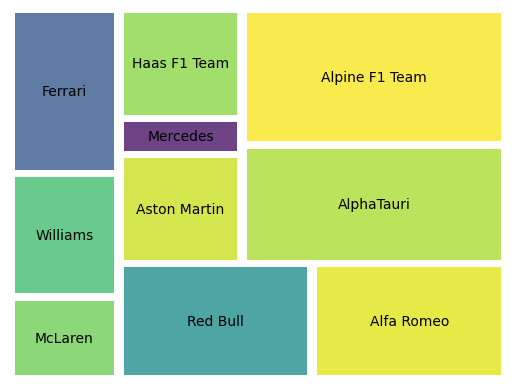

In [48]:
new = pd.DataFrame.from_dict(Safety_of_constructor)
new.head()

sq.plot(sizes=new['No_of_incidents'], label=new['Name_of_Constructors'], alpha=.8,pad=True )
plt.axis('off')
plt.show()

#Driver's Performance

In [49]:
Results=pd.read_csv('/content/Results.csv')
# Filter the data for a specific Grand Prix year, let's say 2022
GP_year = 2014
filtered_Results = Results[Results['GP_year'] >= GP_year].reset_index()

# Now you can use the filtered_df for further analysis or manipulation
Drivers_name_list=['Alexander Albon', 'Carlos Sainz', 'Charles Leclerc', 'Fernando Alonso', 'George Russell', 'Lance Stroll', 'Kevin Magnussen', 'Lando Norris', 'Lewis Hamilton', 'Max Verstappen', 'Valtteri Bottas', 'Sergio Pérez', 'Yuki Tsunoda', 'Pierre Gasly'  ]
Drivers_point_dict={'Alexander Albon':0, 'Carlos Sainz':0, 'Charles Leclerc':0, 'Fernando Alonso':0, 'George Russell':0, 'Lance Stroll':0, 'Kevin Magnussen':0, 'Lando Norris':0, 'Lewis Hamilton':0, 'Max Verstappen':0, 'Valtteri Bottas':0, 'Sergio Pérez':0, 'Yuki Tsunoda':0, 'Pierre Gasly':0}

for i in range(len(filtered_Results)):
  if (filtered_Results.Driver_name[i] in Drivers_name_list) and (filtered_Results['statusId'].iloc[i] in ['+13 Laps', '+6 Laps', 'Accident', 'Collision', "Collision damage", "Damage", "Debris", "Disqualified", "Illness", "Injured", "Injury", "Overheating", "Puncture", 'Spun off', 'Safety Belt', "Tyre puncture", 'Front wing']):
    Drivers_point_dict[filtered_Results.Driver_name[i]]=Drivers_point_dict[filtered_Results.Driver_name[i]]+1

print(Drivers_point_dict)

{'Alexander Albon': 2, 'Carlos Sainz': 1, 'Charles Leclerc': 4, 'Fernando Alonso': 6, 'George Russell': 5, 'Lance Stroll': 4, 'Kevin Magnussen': 4, 'Lando Norris': 3, 'Lewis Hamilton': 1, 'Max Verstappen': 6, 'Valtteri Bottas': 6, 'Sergio Pérez': 2, 'Yuki Tsunoda': 3, 'Pierre Gasly': 1}


In [50]:
keys = Drivers_point_dict.keys()
values = Drivers_point_dict.values()

Safety_of_driver={"Name_of_Driver":keys, "No_of_incidents":values}

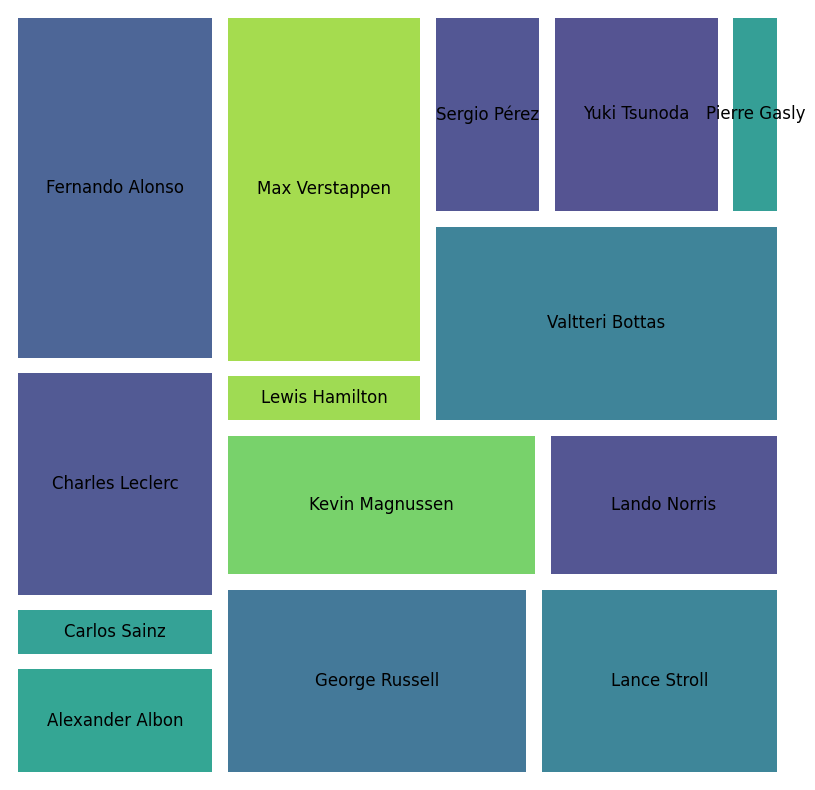

In [51]:
new = pd.DataFrame.from_dict(Safety_of_driver)
new.head()

plt.figure(figsize=(10, 10))
sq.plot(sizes=new['No_of_incidents'], label=new['Name_of_Driver'], alpha=.9,pad=True,text_kwargs={'fontsize': 12})
plt.axis('off')
plt.show()

#Circuit Difficulty

In [52]:
Results=pd.read_csv('/content/Results.csv')
Circuit_name_list=['Albert Park Grand Prix Circuit', 'Autódromo José Carlos Pace', 'Autodromo Enzo e Dino Ferrari', 'Autódromo Hermanos Rodríguez', 'Autodromo Nazionale di Monza', 'Bahrain International Circuit', 'Baku City Circuit', 'Circuit de Barcelona-Catalunya', 'Circuit de Monaco', 'Circuit de Spa-Francorchamps', 'Circuit Gilles Villeneuve', 'Circuit of the Americas', 'Circuit Park Zandvoort', 'Hungaroring', 'Jeddah Corniche Circuit', 'Marina Bay Street Circuit', 'Losail International Circuit','Miami International Autodrome', 'Silverstone Circuit', 'Suzuka Circuit', 'Yas Marina Circuit', 'Red Bull Ring']
Circuit_point_dict={'Albert Park Grand Prix Circuit':0, 'Autódromo José Carlos Pace':0, 'Autodromo Enzo e Dino Ferrari':0, 'Autódromo Hermanos Rodríguez':0, 'Autodromo Nazionale di Monza':0, 'Bahrain International Circuit':0, 'Baku City Circuit':0, 'Circuit de Barcelona-Catalunya':0, 'Circuit de Monaco':0, 'Circuit de Spa-Francorchamps':0, 'Circuit Gilles Villeneuve':0, 'Circuit of the Americas':0, 'Circuit Park Zandvoort':1
                    , 'Hungaroring':0, 'Jeddah Corniche Circuit':0, 'Marina Bay Street Circuit':0, 'Losail International Circuit':0,
                    'Miami International Autodrome':0, 'Silverstone Circuit':0, 'Suzuka Circuit':0, 'Yas Marina Circuit':1, 'Red Bull Ring':0}

for i in range(len(Results)):
  if (Results.Circuit_name[i] in Circuit_name_list) and (Results['statusId'].iloc[i] in [ 'Accident', 'Collision', "Collision damage", "Damage", "Debris", "Injury","Injured", "Overheating", "Puncture", 'Spun off', "Tyre puncture"]):
    Circuit_point_dict[Results.Circuit_name[i]]=Circuit_point_dict[Results.Circuit_name[i]]+1

print(Circuit_point_dict)

{'Albert Park Grand Prix Circuit': 1, 'Autódromo José Carlos Pace': 4, 'Autodromo Enzo e Dino Ferrari': 5, 'Autódromo Hermanos Rodríguez': 1, 'Autodromo Nazionale di Monza': 4, 'Bahrain International Circuit': 2, 'Baku City Circuit': 4, 'Circuit de Barcelona-Catalunya': 2, 'Circuit de Monaco': 3, 'Circuit de Spa-Francorchamps': 3, 'Circuit Gilles Villeneuve': 4, 'Circuit of the Americas': 3, 'Circuit Park Zandvoort': 1, 'Hungaroring': 1, 'Jeddah Corniche Circuit': 3, 'Marina Bay Street Circuit': 6, 'Losail International Circuit': 1, 'Miami International Autodrome': 1, 'Silverstone Circuit': 2, 'Suzuka Circuit': 2, 'Yas Marina Circuit': 1, 'Red Bull Ring': 3}


In [53]:
keys = Circuit_point_dict.keys()
values = Circuit_point_dict.values()

Safety_of_Circuit={"Circuit_name":keys, "No_of_incidents":values}

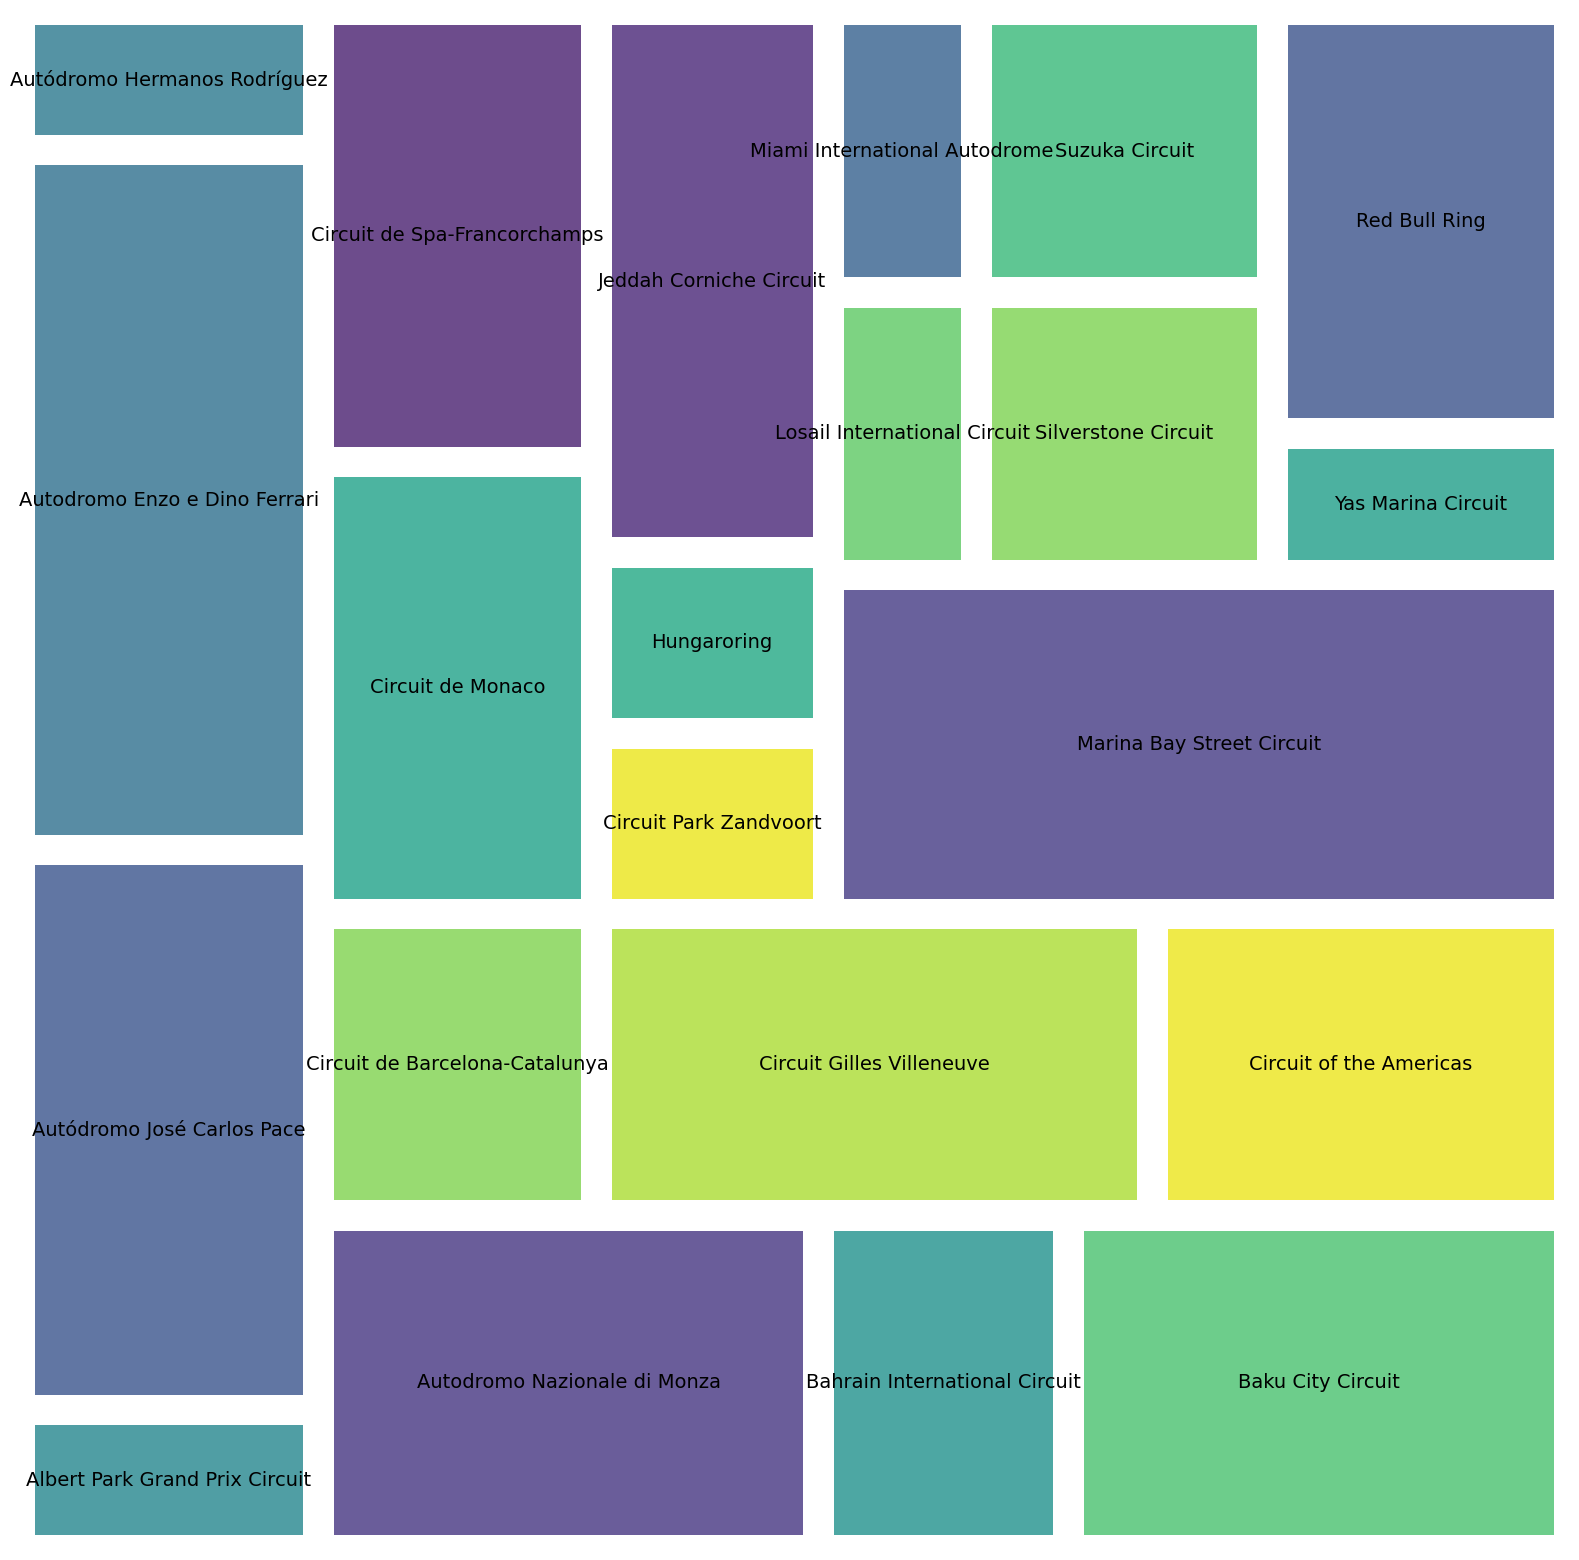

In [54]:
new = pd.DataFrame.from_dict(Safety_of_Circuit)
new.head()

plt.figure(figsize=(20, 20))
sq.plot(sizes=new['No_of_incidents'], label=new['Circuit_name'], alpha=.8,pad=True,text_kwargs={'fontsize': 14} )

plt.axis('off')
plt.show()

#Naive Bayes Model

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.predict([[1, 2023, 10, 57, 5]]))

[7]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [56]:
y_pred=gnb.predict(X_test)
r2_score_NB=r2_score(y_test,y_pred)
print(r2_score_NB)

0.4214810056497338


#Logistic Regression (Classification)

In [57]:
LogReg=LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)

LogReg.fit(X_train, y_train)
y_pred=LogReg.predict([[1, 2023, 10, 57, 5]])
print(y_pred)

[7]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
y_pred=LogReg.predict(X_test)
r2_score_NB=r2_score(y_test,y_pred)
print(r2_score_NB)

0.3484894356626218


#Calibration  Curves

In [59]:
X = Result_Circuit_Encoded[['D_number', 'GP_year', 'Grid_Pos', 'Lap', 'Circuit_name_encoded']]
y= Result_Circuit_Encoded[['Finish_Pos']]

In [60]:
for i in range(len(y)):
  if Result_Circuit_Encoded.Finish_Pos.iloc[i]>1:
    Result_Circuit_Encoded.Finish_Pos.iloc[i]=0
  else:
    Result_Circuit_Encoded.Finish_Pos.iloc[i]=1

y=Result_Circuit_Encoded[['Finish_Pos']]


<ipython-input-60-50d7061b8a61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Result_Circuit_Encoded.Finish_Pos.iloc[i]=0
<ipython-input-60-50d7061b8a61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Result_Circuit_Encoded.Finish_Pos.iloc[i]=1


In [61]:
X, y = make_classification(
    n_samples=len(X_test), n_features=5,  random_state=42)

train_samples = 100  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False, test_size=0.2)

In [62]:
class NaivelyCalibratedLinearSVC(LinearSVC):
    #LinearSVC with `predict_proba` method that naively scales decision_function` output.

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        #Min-max scale output of `decision_function` to [0,1].
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 1, 20)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

In [63]:
# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0)
rfc = RandomForestClassifier()

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (svc, "SVC"),
    (rfc, "Random forest"),]

<ipython-input-64-99ca739c32f1>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Dark2")
/usr/local/lib/python3.9/dist-packages/sklearn/calibration.py:1176: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
  self.line_ = ax.plot(self.prob_pred, self.prob_true, "s-", **line_kwargs)[0]
/usr/local/lib/python3.9/dist-packages/sklearn/calibration.py:1176: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
  self.line_ = ax.plot(self.prob_pred, self.prob_true, "s-", **line_kwargs)[0]
/usr/local/lib/python3.9/dist-packages/sklearn/calibration.py:1176: UserWarning: marker is redunda

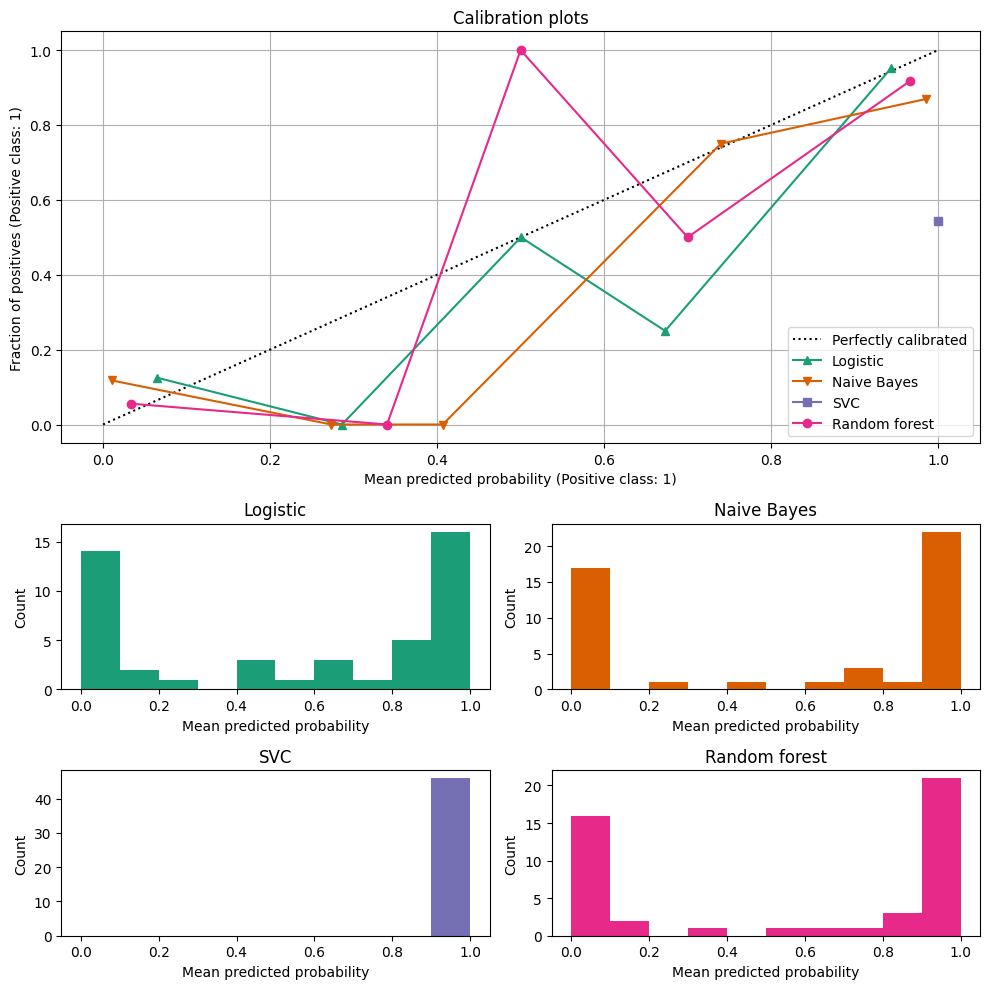

In [64]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=5,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()